In [1]:
import pandas as pd

### Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["Dates"])

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Explore Category

In [3]:
train["Category"].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [5]:
train["Category(actual)"] = train["Category"].copy()
train["Category(predict)"] = train["Category"].copy()

print(train.shape)
train[["Category", "Category(actual)", "Category(predict)"]].head()

(878049, 11)


,Category,Category(actual),Category(predict)
0,WARRANTS,WARRANTS,WARRANTS
1,OTHER OFFENSES,OTHER OFFENSES,OTHER OFFENSES
2,OTHER OFFENSES,OTHER OFFENSES,OTHER OFFENSES
3,LARCENY/THEFT,LARCENY/THEFT,LARCENY/THEFT
4,LARCENY/THEFT,LARCENY/THEFT,LARCENY/THEFT


In [6]:
train.loc[train["Category(actual)"].isin(["TREA"]), "Category(predict)"] = "LARCENY/THEFT"

trea = train[train["Category(actual)"].isin(["TREA"])]

trea[["Category(actual)", "Category(predict)"]]

,Category(actual),Category(predict)
21002,TREA,LARCENY/THEFT
93716,TREA,LARCENY/THEFT
107733,TREA,LARCENY/THEFT
192190,TREA,LARCENY/THEFT
316490,TREA,LARCENY/THEFT
337880,TREA,LARCENY/THEFT


In [7]:
# label을 숫자로 변환해준다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(train["Category(actual)"])

LabelEncoder()

In [11]:
actual = encoder.transform(train["Category(actual)"])

print(actual.shape)
actual

(878049,)


array([37, 21, 21, ..., 16, 35, 12], dtype=int64)

In [18]:
predict = encoder.transform(train["Category(predict)"])

print(predict.shape)
predict

(878049,)


array([37, 21, 21, ..., 16, 35, 12], dtype=int64)

In [21]:
import numpy as np

num_classes = len(np.unique(train["Category"]))

# one hot encoding
predict = np.eye(num_classes)[predict]

print(predict.shape)
predict

(878049, 39)


array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
from sklearn.metrics import log_loss

log_loss(actual, predict)

0.00023601491306698033

** Lesson Learned **
  * 상대적으로 갯수가 적은 카테고리(ex: TREA)를 전부 틀려도 loss가 크게 오르지 않는다.
  * 이는 log_loss가 실제로는 일정 숫자 이상 올라가면 값을 자르도록(clip)하는 기능이 있기 때문. 자세한 내용은 [링크](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) 참조
  * 그러므로 상대적으로 갯수가 적은 카테고리(ex: TREA, PORNOGRAPHY/OBSCENE MAT, GAMBLING보다는 갯수가 많은 카테고리(ex: LARCENY/THEFT, OTHER OFFENSES, NON-CRIMINAL)를 중심으로 모델을 개선해야 한다

## Explore

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Dates

In [25]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 17)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


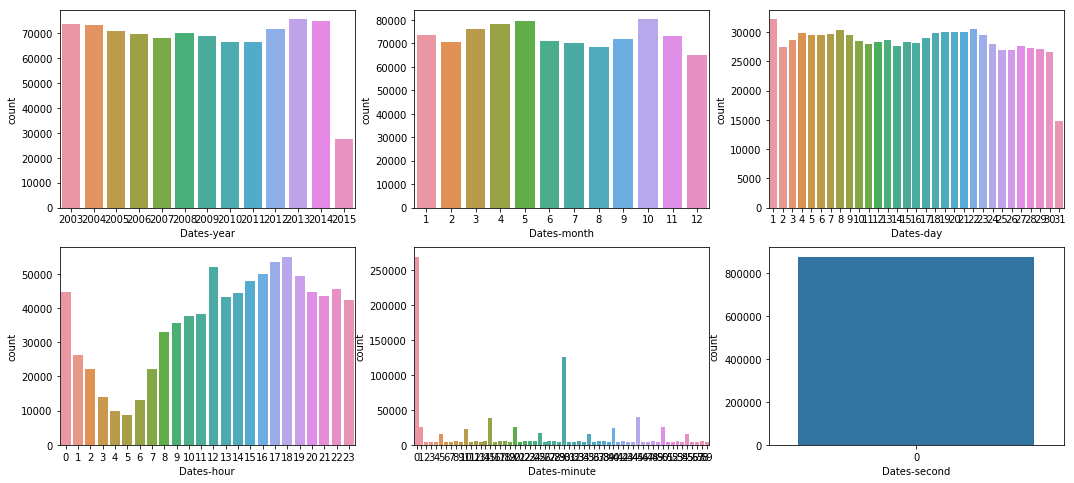

In [26]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

** Lesson Learned **
  * 전반적으로 날짜가 대충대충 기록되어 있다는 것을 알 수 있다. 가령 day는 1이 많고, hour는 0과 12가 많고, minute는 0 > 30 > 15 > 45 > 10 > 20 > 40 > 50 순으로 많다. 이는 구체적인 범죄 발생 시각을 알 수 없기 때문.
  * 이 점을 감안하여, Dates의 값을 너무 신뢰하지 않는 것이 좋다.

### X, Y

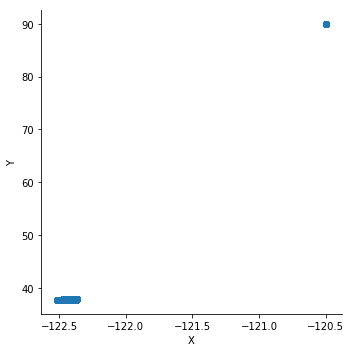

In [27]:
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

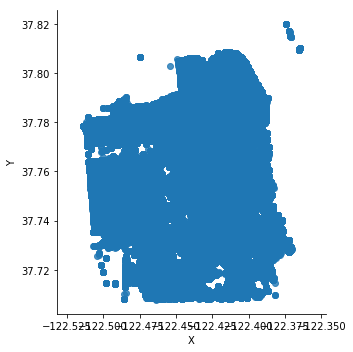

In [28]:
remove_outlier = train[(train["X"] < -120.5) & (train["Y"] < 90)]

sns.lmplot(data=remove_outlier, x="X", y="Y", fit_reg=False)

In [29]:
train[(train["X"] < -120.5) & (train["Y"] < 90)].head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category(actual),Category(predict),Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS,WARRANTS,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,OTHER OFFENSES,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,OTHER OFFENSES,OTHER OFFENSES,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,LARCENY/THEFT,LARCENY/THEFT,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,LARCENY/THEFT,LARCENY/THEFT,2015,5,13,23,30,0


** Lesson Learned ** 
  * 좌표값에는 (-120.5, 90)의 위치에 몰려있는 outlier들이 있다. 이는 X, Y 좌표가 잘못 기록된 것.
  * 이 데이터가 문제가 없게끔 제대로 정리해줘야 할 필요가 있다.

### Address

In [30]:
train.loc[train["Address"].str.contains(" / "), "AddressType"] = "Crossroad"
train.loc[train["Address"].str.contains(" of "), "AddressType"] = "Block"

print(train.shape)
train[["Address", "AddressType"]].head()

(878049, 18)


,Address,AddressType
0,OAK ST / LAGUNA ST,Crossroad
1,OAK ST / LAGUNA ST,Crossroad
2,VANNESS AV / GREENWICH ST,Crossroad
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block


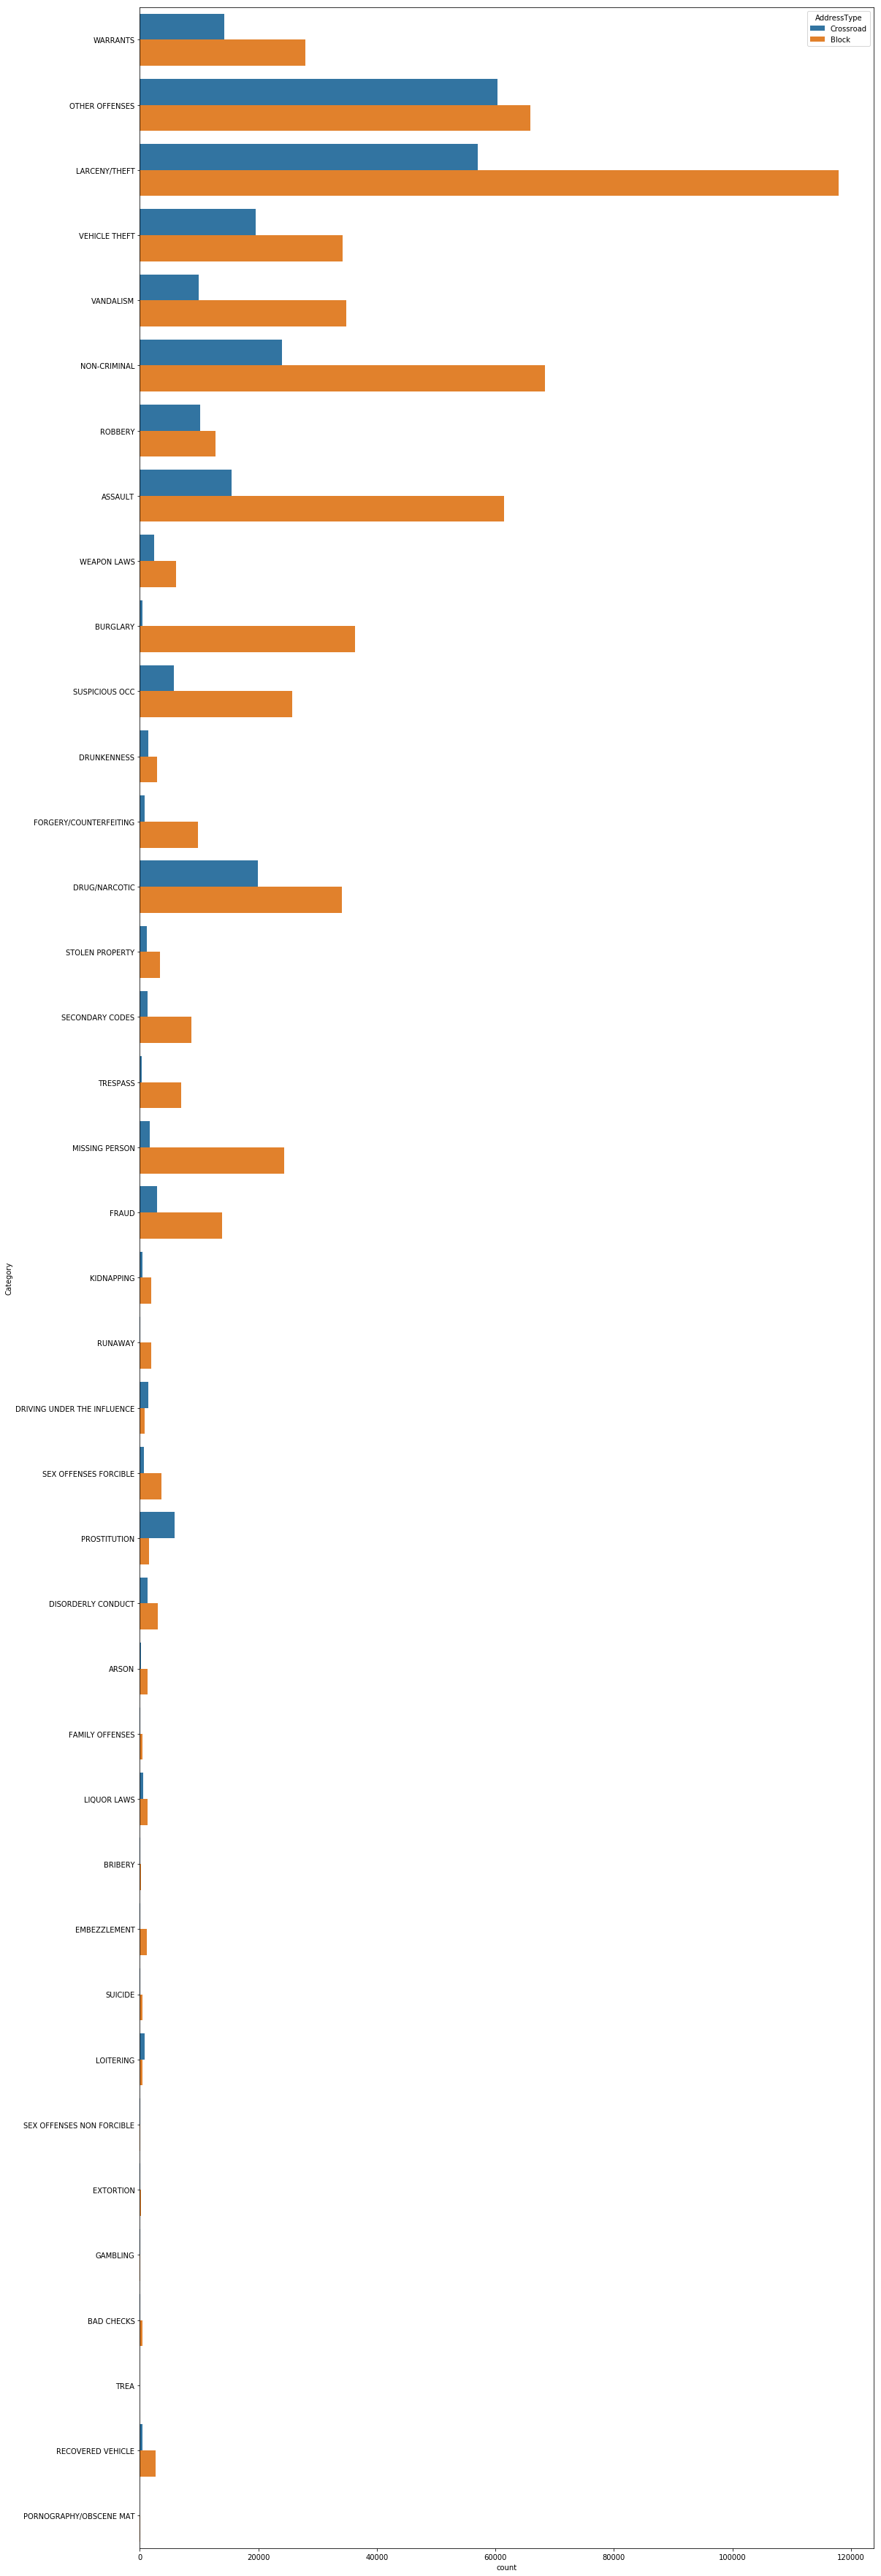

In [31]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 64)

sns.countplot(data=train, y="Category", hue="AddressType", ax=ax)

** Lesson Learned **
  * 주소는 크게 ' / ' 가 있는 데이터(CrossRoad)와 ' of '가 있는 데이터(Block)로 나눌 수 있다. 
  * 두 데이터에 따라서 카테고리의 차이가 크게 나는 것을 알 수 있다.

** Lesson Learned **

In [32]:
oak_laguna = train[train["Address"] == "OAK ST / LAGUNA ST"]

print(oak_laguna.shape)
oak_laguna.head()

(45, 18)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category(actual),Category(predict),Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,AddressType
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS,WARRANTS,2015,5,13,23,53,0,Crossroad
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,OTHER OFFENSES,2015,5,13,23,53,0,Crossroad
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,OTHER OFFENSES,2015,3,8,8,50,0,Crossroad
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,LARCENY/THEFT,LARCENY/THEFT,2015,1,5,20,0,0,Crossroad
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,DRUG/NARCOTIC,DRUG/NARCOTIC,2014,6,29,17,12,0,Crossroad


In [33]:
laguna_oak = train[train["Address"] == "LAGUNA ST / OAK ST"]

print(laguna_oak.shape)
laguna_oak.head()

(27, 18)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category(actual),Category(predict),Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,AddressType
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,OTHER OFFENSES,OTHER OFFENSES,2013,12,11,16,55,0,Crossroad
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,VEHICLE THEFT,VEHICLE THEFT,2013,4,30,11,0,0,Crossroad
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,LARCENY/THEFT,LARCENY/THEFT,2012,6,3,23,0,0,Crossroad
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,VANDALISM,VANDALISM,2011,7,1,0,1,0,Crossroad
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,OTHER OFFENSES,OTHER OFFENSES,2011,1,12,9,15,0,Crossroad


** Lesson Learned **
  * OAK ST / LAGUNA ST가 있으면, LAGUNA ST / OAK ST도 있다. 이는 다른 CrossRoad도 대부분 마찬가지.
  * 이런 데이터를 잘 정리해준다면 더 좋은 결과를 낼 수 있을 것이다.